<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check for missing values in the dataset first
# data preprocessing or data cleaning procedures
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# extract data from column 3 to 5 only, we only need annual income and spending score only
# customer id, gender and age is not relevant here
# because we want to group the customer by annual income and spending score only
# this is known as feature extraction, extract the required columns from the dataset
x = df.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
# how many clusters (k value) we need to use elbow method
# calculate the wcss value from 1 to 10, how many cluster we should created from 1 to 10
# plot the chart below and the answer is 5
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=101)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

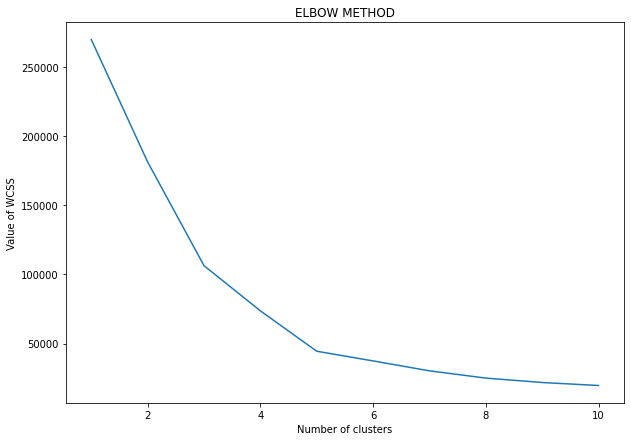

In [6]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of clusters")
plt.ylabel("Value of WCSS")
plt.show()

In [7]:
# send the dataset for kmeans clustering model to create 5 clusters
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=101)
y_pred = kmeans.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

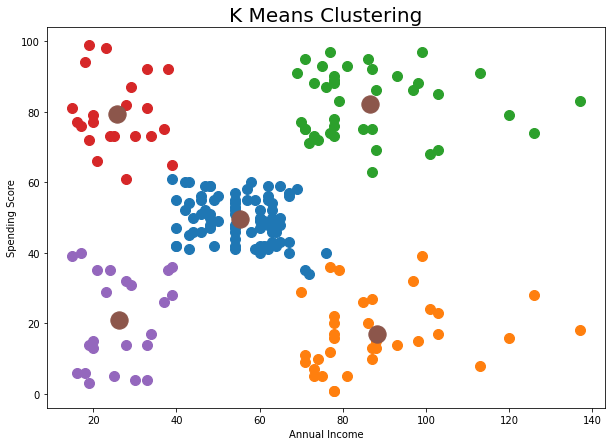

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=100)
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=100)
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=100)
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s=100)
plt.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300)

plt.title("K Means Clustering", fontsize=20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()